In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.family"]="SimHei"
mpl.rcParams["axes.unicode_minus"]=False
# 设置画图格式
plt.style.use("ggplot")
df=pd.read_csv("Hotel.csv",encoding='gbk')
df.head(3)

,Unnamed: 0,名字,类型,城市,地区,地点,评分,评分人数,价格
0,0,香港铜锣湾皇悦酒店(Empire Hotel Hong Kong-Causeway Bay),浪漫情侣,香港,东区,铜锣湾永兴街8号,4.5,12708,693
1,1,香港碧荟酒店(The BEACON),商务出行,香港,油尖旺,九龙旺角洗衣街88号,4.7,328,747
2,2,香港湾仔帝盛酒店(Dorsett Wanchai),浪漫情侣,香港,湾仔,皇后大道东387-397号,4.4,5014,693


In [3]:
df.shape

(396, 9)

In [4]:
# 获取index和columns
df.index
df.columns

Index(['Unnamed: 0', '名字', '类型', '城市', '地区', '地点', '评分', '评分人数', '价格'], dtype='object')

In [5]:
# 每个地区的评分人数的总和以及均值
df['评分人数']=df["评分人数"].astype('int')
#pandas - groupby, agg分组统计
df.评分人数.groupby(df['地区']).agg([np.sum,np.mean])

,sum,mean
地区,,
东区,56643,3540.187500
中西区,59682,1808.545455
九龙城,49855,2374.047619
元朗,1200,1200.000000
其他地区,16831,300.553571
南区,12867,2573.400000
屯门,7324,3662.000000
沙田,39622,9905.500000
油尖旺,422574,2284.183784


In [6]:
# 每个酒店类型的平均价格、最高价、最低价
df['价格']=df['价格'].astype('int')
df['价格'].groupby(df['类型']).agg([np.mean,np.max,np.min])

,mean,amax,amin
类型,,,
交通方便,421.000000,421,421
亲子酒店,745.400000,1686,269
休闲度假,1151.300000,4443,358
其他类型,269.300000,881,67
印象好,297.000000,297,297
商务出行,1045.153846,3159,401
地铁周边,374.139535,2640,67
大学周边,325.000000,325,325
客栈,397.666667,553,245


In [7]:
# 数据离散化，按照价格将酒店分为3个等级，0-500为C，500-1000为B，大于1000为A，列名设置为"价格等级"
# 按价格将酒店分类
df['价格等级']=pd.cut(df['价格'],bins=[0,500,1000,50000],labels=['C','B','A'])
df.head(10)

,Unnamed: 0,名字,类型,城市,地区,地点,评分,评分人数,价格,价格等级
0,0,香港铜锣湾皇悦酒店(Empire Hotel Hong Kong-Causeway Bay),浪漫情侣,香港,东区,铜锣湾永兴街8号,4.5,12708,693,B
1,1,香港碧荟酒店(The BEACON),商务出行,香港,油尖旺,九龙旺角洗衣街88号,4.7,328,747,B
2,2,香港湾仔帝盛酒店(Dorsett Wanchai),浪漫情侣,香港,湾仔,皇后大道东387-397号,4.4,5014,693,B
3,3,如心艾朗酒店(L‘hotel elan),浪漫情侣,香港,观塘,观塘创业街38号,4.6,3427,581,B
4,4,香港隆堡柏宁顿酒店(Hotel Pennington by Rhombus),浪漫情侣,香港,湾仔,铜锣湾边宁顿街13-15号,4.5,1938,869,B
5,5,海景嘉福洲际酒店(InterContinental Grand Stanford Hong ...,海滨风光,香港,油尖旺,尖沙咀_部麽地道70号,4.7,4366,1296,A
6,6,香港怡东酒店(Excelsior Hotel),海滨风光,香港,湾仔,铜锣湾告士打道281号,4.6,6961,1184,A
7,7,香港富豪九龙酒店(Regal Kowloon Hotel),休闲度假,香港,油尖旺,尖沙嘴麽地道71号,4.5,11265,692,B
8,8,港岛香格里拉大酒店(Island Shangri-La),海滨风光,香港,中西区,金钟中区法院道太古广场,4.8,4182,2836,A
9,9,香港广易商务宾馆(家庭旅馆)(WIDE EVER HOSTEL),地铁周边,香港,油尖旺,九龙旺角弥敦道607号新兴大厦14楼16单位,4.1,1029,218,C


In [8]:
# 获取评分均值最高和最低的地区的数据
df['评分']=df['评分'].astype('int')
group=df['评分'].groupby(df['地区']).mean()
# sort_values(ascending=False) ascending这个参数的默认值是True，按照升序排序，当传入False时，按照降序进行排列
group.sort_values(ascending=False)

地区
观塘      4.000000
荃湾      4.000000
罗湖区     4.000000
深水_区    4.000000
沙田      4.000000
屯门      4.000000
元朗      4.000000
东区      4.000000
中西区     3.969697
九龙城     3.952381
湾仔      3.878049
离岛      3.818182
葵青      3.800000
南区      3.800000
其他地区    3.767857
油尖旺     3.751351
Name: 评分, dtype: float64

In [27]:
# isin()接受一个列表，判断该列中元素是否在列表中。
avg_max=df[df.地区.isin(['观塘','荃湾','罗湖区','深水埗区','沙田','屯门','元朗','东区'])]
avg_min=df[df.地区=='油尖旺']

avg_max.append(avg_min).head()

,Unnamed: 0,名字,类型,城市,地区,地点,评分,评分人数,价格,价格等级,热门等级
0,0,香港铜锣湾皇悦酒店(Empire Hotel Hong Kong-Causeway Bay),浪漫情侣,香港,东区,铜锣湾永兴街8号,4,12708,693,B,A
3,3,如心艾朗酒店(L‘hotel elan),浪漫情侣,香港,观塘,观塘创业街38号,4,3427,581,B,A
17,17,香港悦来酒店(Panda Hotel),休闲度假,香港,荃湾,荃湾 荃华街3号,4,13694,358,C,A
20,20,香港北角海逸酒店(Harbour Plaza North Point),海滨风光,香港,东区,"北角 英皇道665号(665 Kings Road, North Point, Hong K...",4,3980,507,B,A
21,21,香港帝景酒店(Royal View Hotel),海滨风光,香港,荃湾,汀九 青山公路353号,4,3289,418,C,A


In [28]:
pd.concat([avg_max,avg_min]).head()

,Unnamed: 0,名字,类型,城市,地区,地点,评分,评分人数,价格,价格等级,热门等级
0,0,香港铜锣湾皇悦酒店(Empire Hotel Hong Kong-Causeway Bay),浪漫情侣,香港,东区,铜锣湾永兴街8号,4,12708,693,B,A
3,3,如心艾朗酒店(L‘hotel elan),浪漫情侣,香港,观塘,观塘创业街38号,4,3427,581,B,A
17,17,香港悦来酒店(Panda Hotel),休闲度假,香港,荃湾,荃湾 荃华街3号,4,13694,358,C,A
20,20,香港北角海逸酒店(Harbour Plaza North Point),海滨风光,香港,东区,"北角 英皇道665号(665 Kings Road, North Point, Hong K...",4,3980,507,B,A
21,21,香港帝景酒店(Royal View Hotel),海滨风光,香港,荃湾,汀九 青山公路353号,4,3289,418,C,A


In [ ]:
数据离散化，按照评分人数将酒店平均分为3个等级，三个等级的酒店数量尽量保持一致。评分人数最多的为A，最少的为C。列名设置为“热门等级”。

In [12]:
# 按评分人数增加热门等级维度
k=np.array(df['评分人数'].values)
k.sort()
len(k)/3

132.0

In [13]:
bins=[k[0],k[132],k[264],k[-1]]
df['热门等级']=pd.cut(df['评分人数'],bins,labels=['C','B','A'])
df.head()

,Unnamed: 0,名字,类型,城市,地区,地点,评分,评分人数,价格,价格等级,热门等级
0,0,香港铜锣湾皇悦酒店(Empire Hotel Hong Kong-Causeway Bay),浪漫情侣,香港,东区,铜锣湾永兴街8号,4,12708,693,B,A
1,1,香港碧荟酒店(The BEACON),商务出行,香港,油尖旺,九龙旺角洗衣街88号,4,328,747,B,B
2,2,香港湾仔帝盛酒店(Dorsett Wanchai),浪漫情侣,香港,湾仔,皇后大道东387-397号,4,5014,693,B,A
3,3,如心艾朗酒店(L‘hotel elan),浪漫情侣,香港,观塘,观塘创业街38号,4,3427,581,B,A
4,4,香港隆堡柏宁顿酒店(Hotel Pennington by Rhombus),浪漫情侣,香港,湾仔,铜锣湾边宁顿街13-15号,4,1938,869,B,B


In [14]:
# 获取最热门酒店平均评分
df[(df.价格等级=='A')&(df.热门等级=='A')]['评分'].mean()

4.0

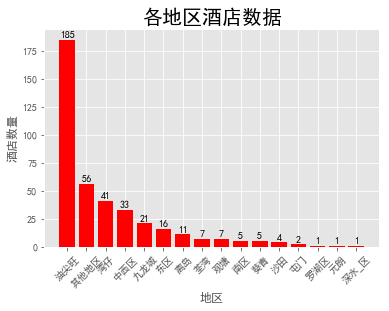

In [32]:
# 每个地区酒店数量分布

data=df['地区'].value_counts()
x=data.index
y=data.values

plt.bar(x,y,color='r')
plt.title('各地区酒店数据',fontsize=20)
plt.xlabel('地区',fontsize=12)
plt.ylabel('酒店数量',fontsize=12)
plt.xticks(rotation=45)

for a,b in zip(x,y):
    plt.text(a,b+1,'%.0f'% b,ha='center',va='bottom',fontsize=10)
    
plt.show()



In [17]:
# 各个价格等级酒店数量分布

data=df['价格等级'].value_counts()
x=data.index
y=data.values

In [18]:
x

CategoricalIndex(['C', 'B', 'A'], categories=['C', 'B', 'A'], ordered=True, dtype='category')

In [19]:
y

array([232,  96,  68])

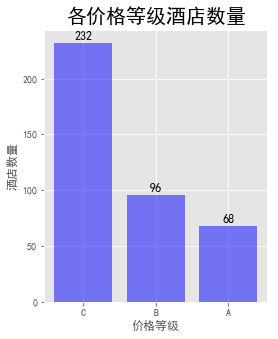

In [20]:
plt.figure(figsize=(4,5))
plt.bar(x,y,color='b',alpha=0.5)
plt.xlabel('价格等级',fontsize=12)
plt.ylabel('酒店数量',fontsize=12)
plt.title('各价格等级酒店数量',fontsize=20)
for a,b in zip(x,y):
    plt.text(a,b+1,'%.0f'% b,ha='center',va='bottom',fontsize=12)

plt.show()

In [21]:
# 各价格等级酒店占比分布
data=df['价格等级'].value_counts()

In [22]:
data

C    232
B     96
A     68
Name: 价格等级, dtype: int64

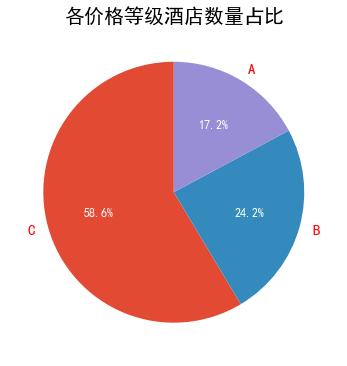

In [23]:
from matplotlib import font_manager
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

label=data.index
y=data.values
y=y/sum(y)

plt.figure(figsize=(6,6))
patches,l_text,p_text=plt.pie(y,labels=label,autopct='%.1f%%',startangle=90)
plt.title('各价格等级酒店数量占比',fontsize=20)

for i in p_text:
    i.set_size(12)
    i.set_color('w')

for i in l_text:
    i.set_size(15)
    i.set_color('r') 

plt.show()

In [24]:
#各热门等级酒店平均评分

data=df['评分'].groupby(df['热门等级']).mean()
data

热门等级
C    3.551181
B    3.924242
A    3.977099
Name: 评分, dtype: float64

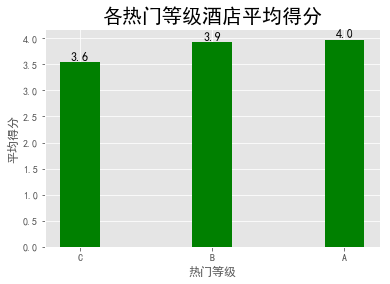

In [25]:
x=data.index
y=data.values

plt.figure(figsize=(6,4))
plt.bar(x,y,color='g',width=0.3)
plt.title('各热门等级酒店平均得分',fontsize=20)
plt.xlabel('热门等级',fontsize=12)
plt.ylabel('平均得分',fontsize=12)

for a,b in zip(x,y):
    plt.text(a,b,'%.1f'% b,ha='center',va='bottom',fontsize=12)
plt.show()

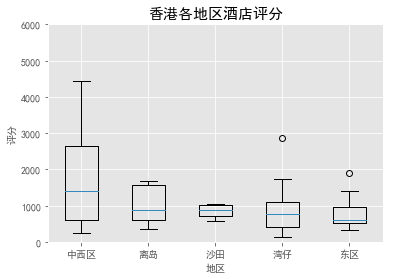

In [40]:
#平均价格top5地区酒店价位箱型图
data=df.groupby(df['地区'])['价格'].mean()
data=data.sort_values(ascending=False)[0:5]

data1=df[df.地区=='中西区']['价格']
data2=df[df.地区=='离岛']['价格']
data3=df[df.地区=='沙田']['价格']
data4=df[df.地区=='湾仔']['价格']
data5=df[df.地区=='东区']['价格']

plt.boxplot([data1,data2,data3,data4,data5],labels=['中西区','离岛','沙田','湾仔','东区'],whis=2)
plt.title('香港各地区酒店评分',fontsize=15)
plt.xlabel('地区',fontsize=10)
plt.ylabel('评分',fontsize=10)
plt.ylim([0,6000])
plt.show()
